# Analysing Video Game Sales

This dataset contains information about individual video games for various platforms and publisher. The crux of this dataset is about the sales of these games in various regions (EU, NA, JP and other regions).

The dataset was obtained from the open source platform, Kaggle which is a great online resource for teaching data science and machine learning concepts working on competitions (alone or with people). 

The major tools used to analyze this data were the core data analytics libraries:
- Pandas
- Numpy
- Matplotlib
- Seaborn

The entire point of using this dataset was to understand which video games are the most popular, which genre is the most sought out, what platform is being played on the most and where are all the games being sold at. 

Essentially, I myself am a fanatic of video games and this project allowed me to find out games which I had never played before and maybe give them a try to see what's all the hype about.

This course project has really taught me alot about how to wrangle data and visualize it with clean and beautiful plots. I have become more proficient at using the Pandas, matplotlib and seaborn libraries for Data Analysis. 

I have also have improved my analytical skills at asking the right questions, and being able to explore the data with techniques that are outside the box.

## Data Preparation and Cleaning

This step is pretty preliminary and involves the removal of missing values, fixing the format of data, fixing incorrect data and applying certain transformations to ensure data is ready for exploration.

This step also provides a rough and general idea of what the dataset looks like. This initial idea will help immensely in the exploratory analysis.



In [1]:
# Importing all essential libraries
import os
import pandas as pd
import numpy as np

In [ ]:
# For those people using google colab environment, uncomment this cell

#from google.colab import drive
#drive.mount('/content/drive')
#file_path = '/content/drive/My Drive/vgsales.csv'


In [ ]:
# For those people using local environment, uncomment this cell

#data_dir = './dataset'
#file_path = data_dir + "/" + os.listdir(data_dir)[0]

In [ ]:
# Loading the video game sales dataset
video_games_df = pd.read_csv(file_path)
video_games_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Checking general information about the dataframe
video_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# Checking all null values
video_games_df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Cleaning the Dataframe of missing values and setting new columns
video_games_df.dropna(inplace = True)
video_games_df.drop('Rank',axis = 1,inplace=True)

# Making Year the first column of the dataset
column_names = list(video_games_df.columns)
column_names.remove('Year')
column_names = ['Year']  + column_names

# resetting the index so there are no discrepancies in between
video_games_df = video_games_df.reindex(columns=column_names)
video_games_df

,Year,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006.0,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1985.0,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2008.0,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,2009.0,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,1996.0,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,2002.0,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,2003.0,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,2008.0,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,2010.0,Know How 2,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# Converting the Year's datatype to be DATETIME
video_games_df.Year = video_games_df.Year.apply(lambda x: pd.to_datetime(x, format = "%Y"))
video_games_df.sort_values('Year',inplace = True)

In [ ]:
video_games_df.head()

,Year,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,1980-01-01,Asteroids,2600,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
6317,1980-01-01,Bridge,2600,Misc,Activision,0.25,0.02,0.0,0.00,0.27
1969,1980-01-01,Defender,2600,Misc,Atari,0.99,0.05,0.0,0.01,1.05
5366,1980-01-01,Freeway,2600,Action,Activision,0.32,0.02,0.0,0.00,0.34
1766,1980-01-01,Kaboom!,2600,Misc,Activision,1.07,0.07,0.0,0.01,1.15


## Exploratory Analysis and Visualization

Once the data is cleaned up and ready, its time to explore all the columns and records for more information. 

The point of this step is to find any correlations between the data and gather some initial insights as to what the data is and how to deal with it.

Essentially, we are trying to understand the information from the data and explore it to make it easier to make decisions.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Firstly, the general statistics of the dataframe are observed to get a general idea of the distribution.

In [ ]:
video_games_df.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,0.265647,0.147731,0.078833,0.048426,0.540910
std,0.822432,0.509303,0.311879,0.190083,1.567345
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


Now, we will check to see how the NA, EU and JP Sales relate to one another. These will then also be compared to the Global Sales to see which one affects the Global Sales the most. These will be achieved through bar charts.

In [ ]:
video_games_df.head()

,Year,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
258,1980-01-01,Asteroids,2600,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
6317,1980-01-01,Bridge,2600,Misc,Activision,0.25,0.02,0.0,0.00,0.27
1969,1980-01-01,Defender,2600,Misc,Atari,0.99,0.05,0.0,0.01,1.05
5366,1980-01-01,Freeway,2600,Action,Activision,0.32,0.02,0.0,0.00,0.34
1766,1980-01-01,Kaboom!,2600,Misc,Activision,1.07,0.07,0.0,0.01,1.15


The distributions of the columns can also be looked at seperately. This will be achieved using histograms. JP, NA, EU and Other Sales will be checked to see how those sales are distributed.

It can clearly be seen from the below images that majority of the sales of video games are negatively skewed. This tells us that are only a few outliers that have sold copies in sales more than 2 or even 5 million sales.

This clearly shows majority of the games are sold for less than a million sales.

In [ ]:
column_names = video_games_df.columns[5:]

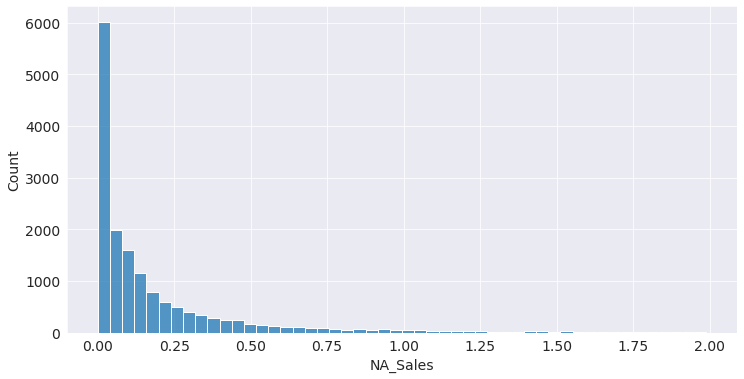

In [ ]:
# Distribution of North American Region Sales
sns.histplot(video_games_df[video_games_df[column_names[0]] < 2][column_names[0]] , bins = 50)

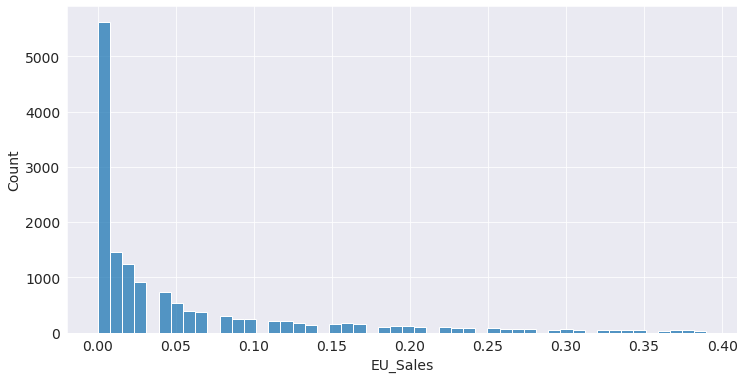

In [ ]:
# Distribution of Europe Region Sales
sns.histplot(video_games_df[video_games_df[column_names[1]] <0.4][column_names[1]],  bins = 50)

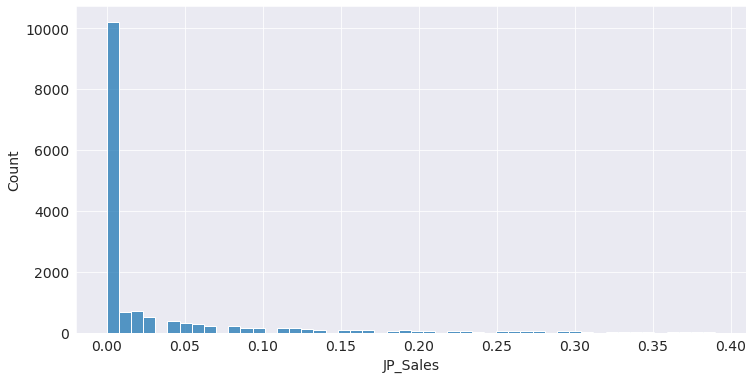

In [ ]:
# Distribution of Japenese Region Sales
sns.histplot(video_games_df[video_games_df[column_names[2]] <0.4][column_names[2]], bins = 50)

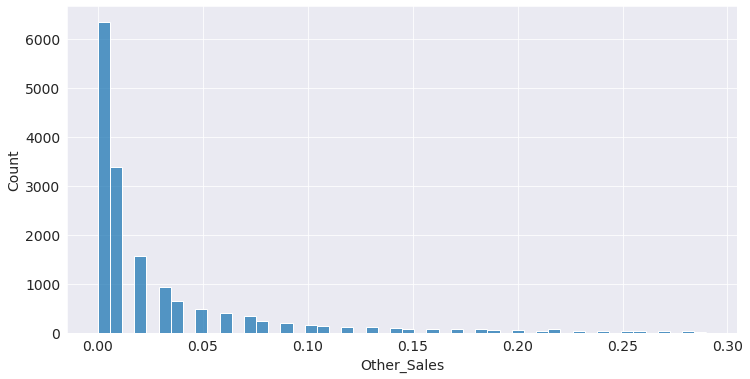

In [ ]:
# Distribution of Other Region Sales
sns.histplot(video_games_df[video_games_df[column_names[3]] < 0.3][column_names[3]], bins = 50)

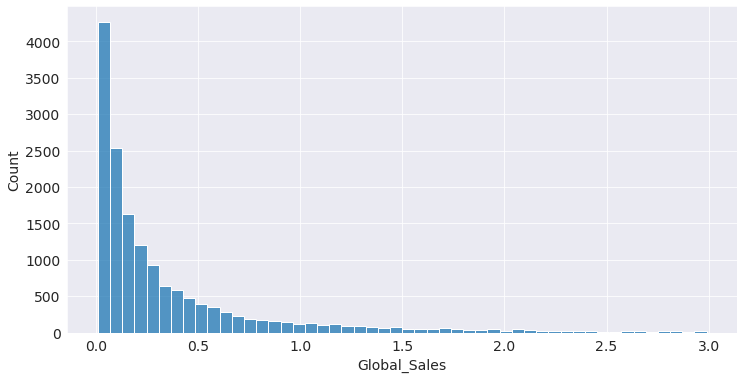

In [ ]:
# Distribution of Global Sales
sns.histplot(video_games_df[video_games_df[column_names[4]] < 3][column_names[4]], bins = 50)

Its also always good to draw a correlation matrix between numerical columns to see which variables are the most closely related (or unrelated) to one another. 

The following correlation matrix shows that 'Global_Sales' are mostly affected by NA and EU sales. Also, EU Sales seem to have an influence on them by NA Sales and so they are also closely correlated to one another.

Japan seems to not be influenced so much by EU or NA and they are rather leaning more towards independant development and publishing of games.

Other regions, where games aren't that popular, are mostly affected by EU and somewhat by NA. This could be due to games that are being imported from countries in EU to these regions.

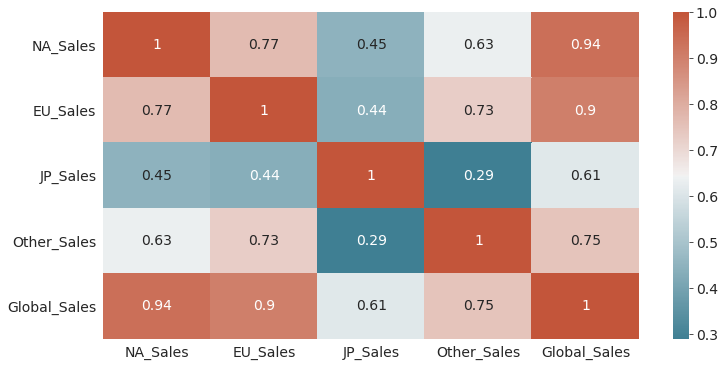

In [ ]:
corr = video_games_df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Also, from the graph below, it can be seen that (last row) the most impact on the global sales come mainly from NA Sales and EU Sales, which further confirms our inference we made from the correlation matrix. 

JP Sales and other regional sales also have a small impact.

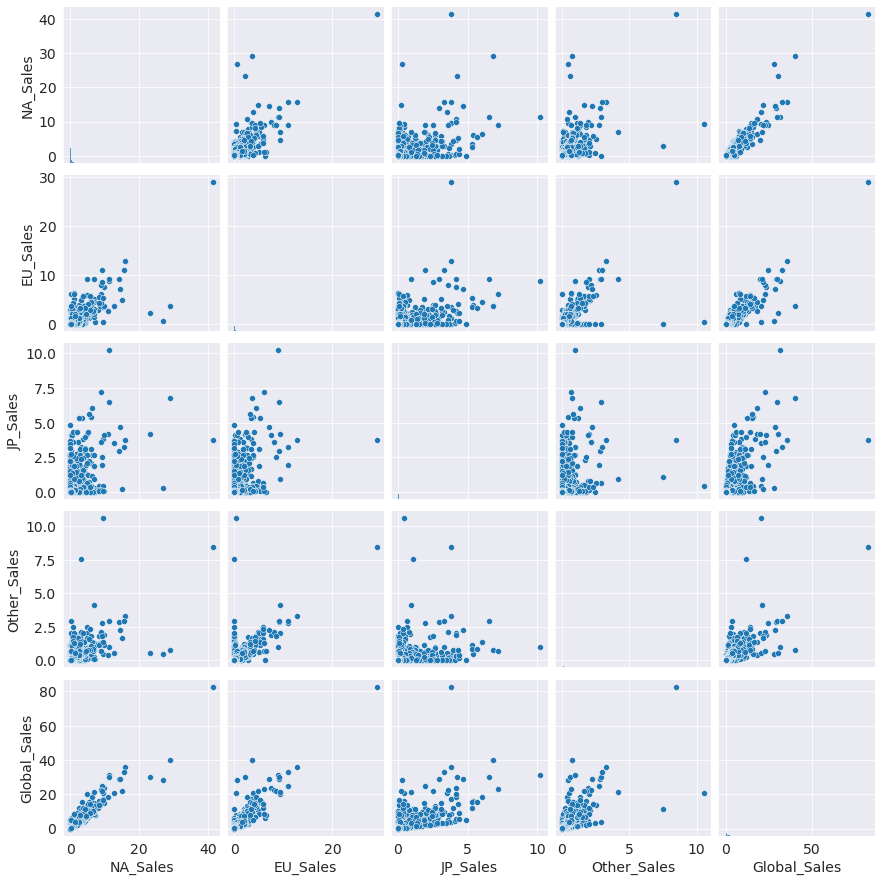

In [ ]:
sns.pairplot(video_games_df)

## Asking and Answering Questions

As this dataset is about video game sales, questions can be asked about what platform, genre, publisher or even region is the best in terms of sales. 

These questions could only be asked since there was a clear understanding of what the data holds and all the correlations between the columns.



#### Q1: Which platform was the most successful every year (in terms of sales)?

The purpose of this question is to understand exactly which platform was the most succesful every year. 

This was achieved by grouping all the years with the platforms, and summing all the sales for those respective years. Then for every year, the platform with the most 'Global_Sales' was selected and appended to a new dataframe.



In [ ]:
temp_df = video_games_df.groupby(['Year', 'Platform']).sum() # Grouping all the records by Year and Platform (using pd.DataFrame.groupby)
years = []
platforms = []
sales = []
visited = []
for i,(date,platform) in enumerate(temp_df.index): # iterate over each year 

  time_stamp = str(date).split(" ")[0]

  if time_stamp in visited: # This if condition ensures we don't repeat the same year again
    continue

  bool_series = temp_df.loc[time_stamp].Global_Sales == temp_df.Global_Sales.max(level = 0)[time_stamp] # For every year, we try to find the platform with the most sales using the 'max' method of series and dataframes
  answer_df = temp_df.loc[time_stamp][bool_series] # extracting the row with the highest global sales
  answer_df.reset_index(level = [0,1], inplace = True) # resetting the Year and Platform index to act as columns for the final dataframe using the 'reset_index' method

  
  years.append(answer_df['Year'][0]) # List of all the years
  platforms.append(answer_df['Platform'][0]) # List of the platform with most sales
  sales.append(answer_df['Global_Sales'][0]) # The global sales for the respective platform
  
  visited.append(time_stamp)

q1_df = pd.DataFrame({"years":years, 'platform':platforms, "sales":sales}) # Creating a new dataframe from a dictionary of lists (Year, Platform and Global Sales)
q1_df.years = q1_df.years.apply(lambda x : x.year) # Converting the normal date format to just the year to see it easily in the barplot
q1_df.head()

,years,platform,sales
0,1980,2600,11.38
1,1981,2600,35.77
2,1982,2600,28.86
3,1983,NES,10.96
4,1984,NES,50.09


Next, the global sales, years and platform columns are used to plot the bar graph.

The bar graph is plotted horizontally as to show all the years with overlap. A subplot axis is provided just for changing the figure size (which isn't the same as the global figure size).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Year')

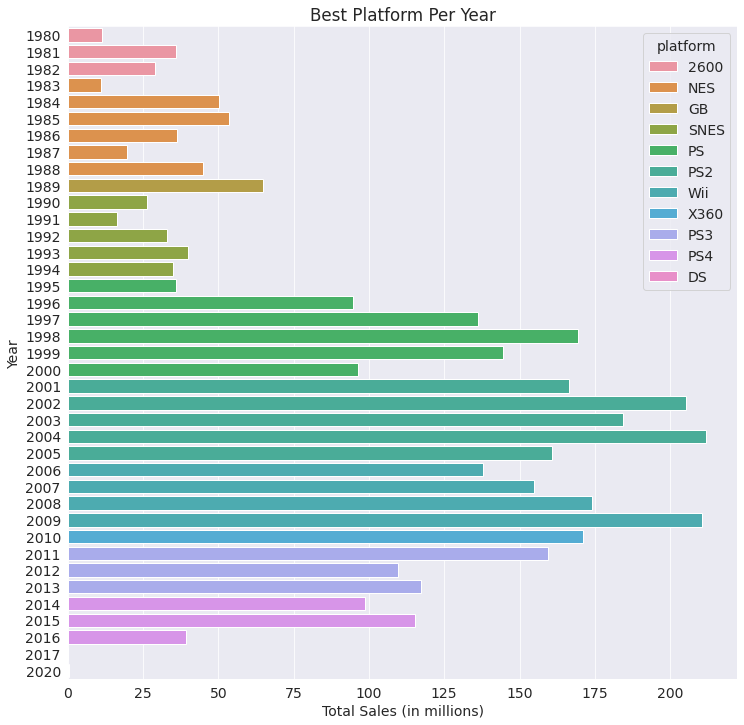

In [ ]:
q1_fig, q1_ax = plt.subplots(figsize = (12,12)) # setting a subplot just to provide a custom figure size (instead of the global one)

sns.barplot(q1_df.sales,q1_df.years,hue = q1_df.platform, orient = 'h',ax= q1_ax, dodge = False) # This seaborn function creates a horizontal barplot (by setting orientation)

plt.title('Best Platform Per Year') # Setting the title
plt.xlabel('Total Sales (in millions)') # Setting the x axis label
plt.ylabel('Year') # Setting the y axis label

#### Q2: Which region had the most number of sales every year?

This question allows us to explore which region was the most influential and dominant in the video games market.

This was achieved, firstly, by creating a new dataframe by only selecting the Year and all the sales columns. 

Next, 2 new columns were added to the newly created dataframe, 'Best_Region' and 'Best_Sale'. These columns were made from selecting the column names with the max value and the max value of those columns, respectively.

Once the dataframe is prepped, a series object is made by grouping the dataframe by Year and the Best Region and summing the sales of all the regions.

This meant that we sum all the sales for all the best regions. For every year, we had the best sales for every region and so every year had 4 values (NA Best Sale, EU Best Sale, JP Best Sales, and Other regions Best Sales).

In [ ]:
def fix_region_name(region_name): # Function to be applied to the Best_Region column to fix their names
  if region_name.startswith('Ot'):
    return 'Others'
  
  return region_name[:2]

In [ ]:
q2_df = video_games_df[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales']] # Selecting only the columns with sales
q2_df.Year = q2_df.Year.apply(lambda x : x.year) # Convert the Datetime year format to just a single Year value (to show on the barplot with ease)

q2_df['Best_Region'] = q2_df.loc[:,'NA_Sales':].idxmax(axis=1) # Creating a new column with the name of the regions that have the highest sale for the respective game (using idxmax method)
q2_df.Best_Region =  q2_df.Best_Region.apply(lambda x: fix_region_name(x)) # fixing the names for the regions

q2_df['Best_Sale'] = q2_df[['NA_Sales','EU_Sales','JP_Sales']].max(1) # Together with the region names, a new column is created for the 'Best Sales'


# Obtaining the values for the barplot
q2_series = q2_df.groupby(['Year','Best_Region']).sum().Best_Sale # Grouping all the years to
q2_bar_x = list(q2_series) # Best Sales
q2_bar_y = list(q2_series.index.get_level_values(0)) # Years
q2_bar_hue = list(q2_series.index.get_level_values(1)) # Best Regions

q2_series.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

Year  Best_Region
1980  NA             10.59
1981  NA             33.40
1982  NA             26.92
1983  JP              7.65
      NA              5.95
Name: Best_Sale, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Regional Sales per Year')

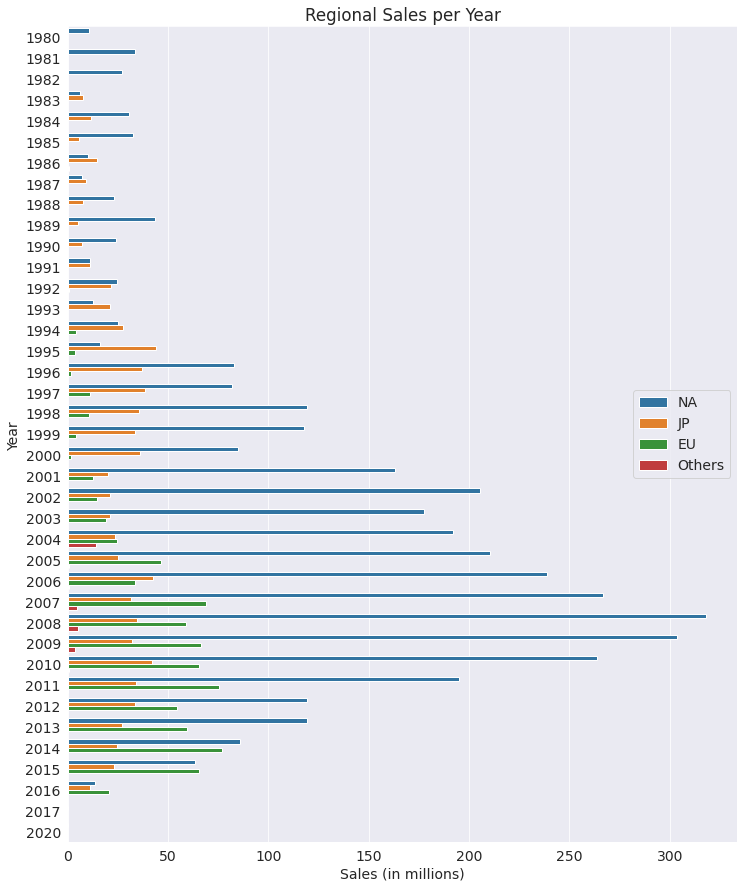

In [ ]:
q2_fig, q2_ax = plt.subplots(figsize = (12,15)) # Again, creating a subplot just for controlling the specific figure size
sns.barplot(q2_bar_x,q2_bar_y,hue = q2_bar_hue, orient = 'h', ax = q2_ax) # plotting the bar graph with the Best Sales on x axis, year on y axis, and the name for each bar as the hue

plt.xlabel('Sales (in millions)') # X axis label
plt.ylabel('Year') # Y axis label
plt.title('Regional Sales per Year') # Title of plot

#### Q3: Which genre of games was the most sought out in every decade?

Every person has different taste for games, but collectively there exists a genre which majority of the population (of the world) likes the most. 

With this question, we intend to find out which genre was the most popular for every decade, based on how many sales were made for those specific genres.

This was done by firstly grouping the main video games dataframe by decade and by Genre. Now, we have obtained all genre sales for each decade summed up.

Next, we had to obtain the best genre for the decade. This was simply done by obtaining the genre with the most 'Global_Sales' and making a new dataframe with just the best genre records. 

In [ ]:
q3_df = video_games_df.groupby([pd.Grouper(key = 'Year', freq = '10AS'), 'Genre']).sum() # using pd.Grouper, the years were able to be sampled for every decade, and then we grouped by decades and Genres
q3_finalized_df = pd.DataFrame() 

for index in q3_df.Global_Sales.max(level = 0).index: 
  # For every decade, the Genre with the most global sales is found first (using max method)
  # The index is reset (to obtain them for plotting)
  # Then the record is appended to a dataframe
  q3_condition = q3_df.Global_Sales == q3_df.Global_Sales.max(level = 0).loc[index]
  q3_finalized_df = q3_finalized_df.append(q3_df[q3_condition].reset_index())

q3_finalized_df.reset_index(drop = True, inplace = True) # removing the numbered index with value 0
q3_finalized_df.Year = q3_finalized_df.Year.apply(lambda x: x.year) # setting the year into a proper format for plotting
q3_finalized_df = q3_finalized_df.iloc[:-1] # The last record isn't considered since we don't yet have information for that decade
q3_finalized_df # NA_Sales to Other_Sales columns are irrelevant

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,Platform,74.34,13.24,32.45,2.23,122.27
1,1990,Platform,112.55,46.15,42.99,7.18,208.91
2,2000,Action,463.12,235.80,60.02,99.37,858.91
3,2010,Action,287.75,236.27,70.72,78.41,673.46


The bar graph is plotted for each decade and the dodge argument is used since there are only 1 bars for every decade to draw (the genres with the most sales).

The last decade was dropped since that decade has just started. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Global Sales (in millions)')

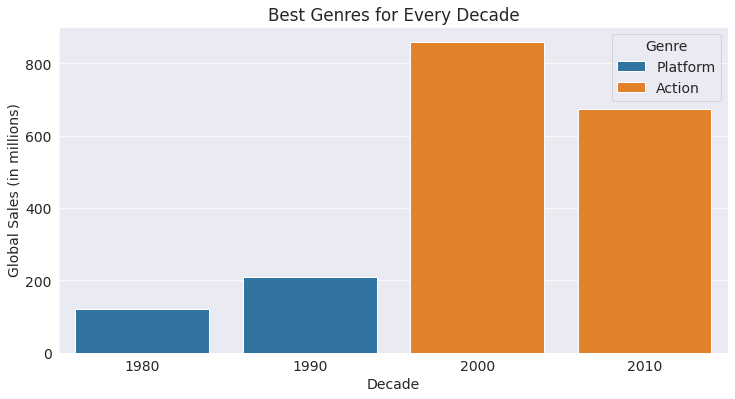

In [ ]:
sns.barplot('Year','Global_Sales',hue = 'Genre', data = q3_finalized_df, dodge = False)
plt.title('Best Genres for Every Decade') # Title
plt.xlabel('Decade') # x axis label
plt.ylabel('Global Sales (in millions)') # y axis label

#### Q4: Which publisher has been the most successful worldwide?

After finding out about which genre was considered the best, we ultimate had to know which publisher was being the most successful with their games.

We decided to look at the top 10 publishers with the most sales, so we grouped all the video games by Publisher, summed together and then sorted in the descending order. 

After selecting the top publishers, the rest of the publishers were combined into 1 (others) by combining all their sales columns. This record was then appending to the top publishers dataframe.


In [ ]:
top_index = 10
q4_df = video_games_df.groupby('Publisher').sum().sort_values('Global_Sales', ascending = False) # video games are grouped by publisher and then are sorted by Global Sales (in descending order)
top_publishers = q4_df.iloc[:top_index] # only the top 10 publishers are considered
others = pd.Series(q4_df.iloc[top_index:].sum(), name = 'Others') # Every other publisher after the top 10 are all grouped into 1 record
top_publishers = top_publishers.append(others)
top_publishers 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Ubisoft,252.81,163.03,7.33,50.16,473.54
Take-Two Interactive,220.47,117.95,5.83,55.20,399.30
THQ,208.60,94.60,5.01,32.11,340.44
Konami Digital Entertainment,88.91,68.62,90.93,29.91,278.56
Sega,108.78,81.41,56.19,24.30,270.70


Ultimately, to show the comparisons, it was decided to use a pie chart to show the sales. This was because there was no sequential or time series data.

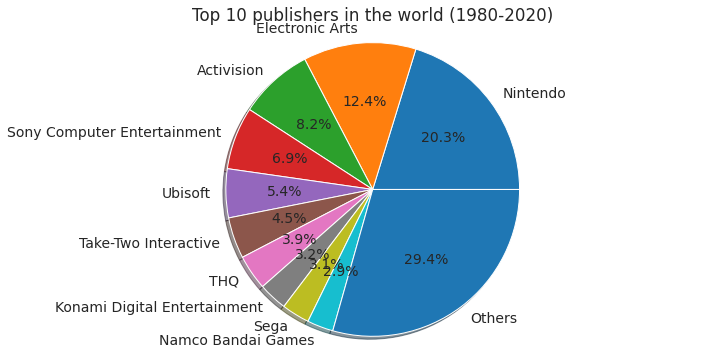

In [ ]:
plt.pie(top_publishers.Global_Sales, labels = top_publishers.index, autopct='%1.1f%%',shadow=True) # This matplotlib function plots a piechart with shadows and proper formatted percentages
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top ' + str(top_index) + " publishers in the world (1980-2020)") # Setting the title of the plot

plt.show()

#### Q5: Which games have sold the most number of copies world wide?

For all the questions asked before, the most fundamental and obvious question to ask was this one. Since this dataset was all about video games, eventually we had to know which 10 games were the most successful.

To begin with this question, firstly all duplicate records had to be removed with the same video game name. This was because there were many games that were being sold on multiple platforms.

To fix this issue, firstly the records were sorted by Global_Sales in descending order, then all duplicates (except the first record with the highest value) was kept for each game.

In [ ]:
top_game_index = 10
q5_df = video_games_df.sort_values('Global_Sales', ascending = False).drop_duplicates('Name') # Games with duplicate names are dropped (since they are sold for multiple platforms)

top_games = q5_df.iloc[:top_game_index] # The top 10 games are considered for their sales
top_games 

,Year,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2006-01-01,Wii Sports,Wii,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,1985-01-01,Super Mario Bros.,NES,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,2008-01-01,Mario Kart Wii,Wii,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,2009-01-01,Wii Sports Resort,Wii,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,1996-01-01,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,1989-01-01,Tetris,GB,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,2006-01-01,New Super Mario Bros.,DS,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,2006-01-01,Wii Play,Wii,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,2009-01-01,New Super Mario Bros. Wii,Wii,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,1984-01-01,Duck Hunt,NES,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


The following percentages might be misleading since they weren't calculated from all the Global_Sales but just the sales of the top 10 games provided for plotting. 

We were just trying to find the names of these top 10 names and were trying to show how significant their presence is in the world.

These top 10 games are also all by Nintendo, which shows how much of the video game economy, around the world, they control.

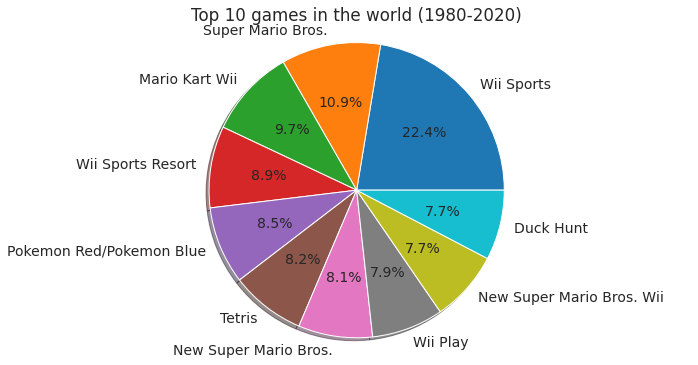

In [ ]:
plt.pie(top_games.Global_Sales, labels = top_games.Name, autopct='%1.1f%%',shadow=True) # This matplotlib function plots a piechart with shadows and proper formatted percentages
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top ' + str(top_game_index) + " games in the world (1980-2020)")

plt.show()

## Inferences and Conclusion

From our initial exploratory data analysis, we observed that majority of the sales worldwide were impacted by the sales generated in regions of NA (North America) and EU (Europe). There were slight impacts from JP (Japan) and Other regions but they weren't that significant.

We also noted that NA Sales had a major influence on EU sales and EU sales seemed to have a major impact on Other regional sales, where JP remained not too affected by the rest.

For individual video games, sales were mostly negatively skewed below the 1 million sales mark. Only a few games, outliers, had it in the double digits.

When it came to platforms, the top 3 dominating consoles were the Playstation 1, Playstation 2 and the Wii from 1995 to 2009.

Looking at regions, North America seems to be the most dominating region in terms of Global Sales, having the most sales in every year except in years before 1996. In years before 1996, the Japanese region had major sales due to their local consoles NES, GB and SNES (which are owned by Nintendo) being so popular.

With regards to the genres, in early 80s and 90s, Platformers were considered the best but during the 2000s and 2010s, the Action genre was highly considered. These are the years during which various shooters (third person and first person) became widely popularised.

Regards to the video games and publishers, Nintendo has been the largest publisher from the 80s to the current decade. This is further complemented by the fact that the top 10 selling games are all by Nintendo. 

Overall, it is easy to see that Japanese region was only popular because of Nintendo. Nintendo was able to become an international brand, garnering multi million dollar sales in the regions of North America, Europe, and other regions.

## References and Future Work

This initial project was mostly for improving my understanding of data analysis but I could take it a notch further and merge more datasets. These could include finding information about the average time a user has spent playing the game, reviews about the game (good or bad), and also the prices of individual games for every console.

Some resources:
- For EDA: https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e
- For visualization: https://jovian.ai/aakashns/python-matplotlib-data-visualization